# IWP ML model

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

## Importing Data

In [4]:
data = pd.read_csv('data.csv', usecols=['medical_specialty', 'transcription'])
data.loc[data.medical_specialty == ' Cardiovascular / Pulmonary', "medical_specialty"] = 'Cardiovascular'
data.loc[data.medical_specialty == ' Neurosurgery', 'medical_specialty'] = 'Neurology'
data.loc[data.medical_specialty == ' Neurology', 'medical_specialty'] = 'Neurology'
data.loc[data.medical_specialty == ' Urology', 'medical_specialty'] = 'Urology'
data.loc[data.medical_specialty == ' Obstetrics / Gynecology', 'medical_specialty'] = 'Gynecology'
data.loc[data.medical_specialty == ' Gastroenterology', 'medical_specialty'] = 'Gastroenterology'
data.loc[data.medical_specialty == ' Nephrology', 'medical_specialty'] = 'Gastroenterology'
data.loc[data.medical_specialty == ' Orthopedic', 'medical_specialty'] = 'Orthopedic'
# data.loc[data.medical_specialty == ' Surgery', 'medical_specialty'] = 'Surgery'
# data.loc[data.medical_specialty == ' Radiology', 'medical_specialty'] = 'Radiology'

# data = data[data.medical_specialty.isin(['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology'])]
data = data[data.medical_specialty.isin(['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic'])]

data = data[['transcription', 'medical_specialty']]

In [5]:
data.head()

,transcription,medical_specialty
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular
4,1. The left ventricular cavity size and wall ...,Cardiovascular
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular


## Data Preprocessing

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayushgupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ayushgupta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
import string

def remove_punct(text):
    for p in string.punctuation:
        text = text.replace(p, ' ')
    text = ' '.join(text.split())
    return text

In [8]:
data.rename(columns = {'transcription':'Report', 'medical_specialty':'speciality'}, inplace = True)
data = data.dropna()
X=data
X['Report'] = X['Report'].map(lambda x: remove_punct(x).lower())

## Training/Testing stuff

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X['Report'], X['speciality'], test_size=0.2, random_state=42)

In [10]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train = y_train.replace({'Cardiovascular': 0, 'Neurology': 1, 'Urology': 2, 'Gynecology': 3, 'Gastroenterology': 4, 'Orthopedic': 5}).to_numpy()
y_test = y_test.replace({'Cardiovascular': 0, 'Neurology': 1, 'Urology': 2, 'Gynecology': 3, 'Gastroenterology': 4, 'Orthopedic': 5}).to_numpy()

In [11]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [12]:
X_train

2115    preoperative diagnoses 1 recurrent intractable...
163     preoperative diagnosis refractory priapism pos...
2551    pre eclampsia is a very serious condition uniq...
2731    preoperative diagnosis herniated nucleus pulpo...
4639    preoperative diagnosis empyema of the chest le...
                              ...                        
3519    preoperative diagnoses nonhealing decubitus ul...
4609    reason for consultation ventricular ectopy and...
2848    cc progressive visual loss hx 76 y o male sudd...
4777    name of procedure left heart catheterization w...
3515    preoperative diagnosis large juxtarenal abdomi...
Name: Report, Length: 1327, dtype: object

In [13]:
y_train

array([5, 2, 3, ..., 1, 0, 4])

In [14]:
X_test

3031    reason for exam lower quadrant pain with nause...
2201    preoperative diagnosis displaced left subtroch...
3685    chief complaint nausea present illness the pat...
3035    reason for exam right sided abdominal pain wit...
4771    procedure left heart catheterization coronary ...
                              ...                        
4895    history the patient is an 86 year old woman wi...
3558    procedures esophagogastroduodenoscopy and colo...
2008    title of operation youngswick osteotomy with i...
4641    preoperative diagnosis empyema postoperative d...
2874    cc dysarthria hx this 52y o rhf was transferre...
Name: Report, Length: 332, dtype: object

In [15]:
y_test

array([4, 5, 4, 4, 0, 4, 0, 0, 2, 3, 3, 0, 3, 3, 4, 0, 3, 0, 5, 0, 4, 1,
       3, 1, 4, 1, 5, 0, 0, 2, 0, 0, 4, 5, 5, 0, 0, 5, 2, 0, 4, 5, 3, 1,
       4, 0, 0, 5, 2, 2, 5, 0, 2, 1, 2, 5, 5, 4, 1, 5, 5, 3, 4, 0, 4, 5,
       3, 5, 5, 5, 5, 5, 4, 4, 1, 5, 2, 4, 0, 4, 3, 5, 4, 5, 5, 1, 4, 4,
       5, 0, 2, 1, 2, 4, 2, 1, 4, 1, 0, 4, 0, 5, 5, 5, 4, 2, 0, 1, 0, 2,
       5, 5, 1, 1, 0, 5, 5, 5, 4, 3, 4, 1, 4, 5, 1, 1, 1, 4, 4, 2, 5, 1,
       4, 1, 4, 1, 4, 5, 5, 1, 1, 4, 0, 3, 0, 1, 5, 5, 5, 1, 2, 2, 1, 5,
       1, 3, 5, 1, 5, 3, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 5, 5, 4, 1, 5, 4,
       3, 5, 4, 5, 5, 5, 5, 2, 4, 0, 2, 4, 4, 1, 4, 4, 3, 0, 3, 5, 1, 4,
       1, 5, 5, 0, 1, 1, 0, 3, 0, 5, 4, 0, 5, 1, 1, 0, 0, 1, 4, 0, 5, 4,
       5, 3, 1, 1, 5, 0, 4, 3, 5, 3, 3, 1, 0, 1, 3, 5, 5, 4, 3, 0, 2, 5,
       1, 1, 3, 3, 4, 0, 4, 1, 0, 4, 0, 4, 2, 0, 4, 5, 5, 5, 3, 5, 5, 0,
       4, 5, 2, 5, 0, 1, 1, 4, 0, 0, 5, 5, 1, 5, 0, 0, 4, 1, 4, 5, 2, 5,
       2, 2, 5, 0, 2, 3, 2, 0, 1, 4, 1, 3, 5, 4, 1,

## Model

## DL models

#### CNN-LSTM

In [16]:
from dsbox.ml.neural_networks import KerasFactory
from dsbox.ml.neural_networks.keras_factory.image_models import KerasApplicationFactory
from dsbox.ml.neural_networks.processing import Text2Sequence
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_is_fitted
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils.np_utils import to_categorical

In [17]:
from nltk.stem.snowball import EnglishStemmer
from dsbox.ml.neural_networks.processing.text_classification import Text2Sequence
from dsbox.ml.neural_networks.keras_factory.text_models import CNN_LSTMFactory
from dsbox.ml.neural_networks.processing.workflow import TextNeuralNetPipeline

t2s=Text2Sequence(stemmer=EnglishStemmer())
model = TextNeuralNetPipeline(text2seq=t2s,
                              factory_class=CNN_LSTMFactory, 
                              num_labels=6)

In [18]:
cnn_lstm = model.fit(X_train, y_train, 
                     epochs=15,
                     batch_size=100, 
                     shuffle=True)

/Users/ayushgupta/opt/anaconda3/lib/python3.8/site-packages/dsbox/ml/neural_networks/processing/text_classification.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return sequence.pad_sequences(np.array(word_ids), maxlen=self.seq_len, value=pad_value)


Epoch 1/15
14/14 [==============================] - 9s 497ms/step - loss: 1.7675 - accuracy: 0.2419
Epoch 2/15
14/14 [==============================] - 7s 504ms/step - loss: 1.7085 - accuracy: 0.2751
Epoch 3/15
14/14 [==============================] - 8s 555ms/step - loss: 1.5677 - accuracy: 0.3595
Epoch 4/15
14/14 [==============================] - 7s 484ms/step - loss: 1.1466 - accuracy: 0.5720
Epoch 5/15
14/14 [==============================] - 7s 490ms/step - loss: 0.9001 - accuracy: 0.6194
Epoch 6/15
14/14 [==============================] - 7s 472ms/step - loss: 0.7663 - accuracy: 0.6956
Epoch 7/15
14/14 [==============================] - 7s 509ms/step - loss: 0.6809 - accuracy: 0.7438
Epoch 8/15
14/14 [==============================] - 7s 501ms/step - loss: 0.5613 - accuracy: 0.8395
Epoch 9/15
14/14 [==============================] - 8s 555ms/step - loss: 0.4554 - accuracy: 0.8696
Epoch 10/15
14/14 [==============================] - 7s 490ms/step - loss: 0.3799 - accuracy: 0.8809

In [19]:
y_pred_cnn_lstm = cnn_lstm.predict(X_test)

In [20]:
cnn_lstm.predict(["Focused examination of the right index finger demonstrates a 1 cm transverse wound across the dorsal DIP joint. The wound has almost completely healed. There are three residual nylon sutures, which are all removed today. There is no localized erythema, induration, swelling or tenderness. There is an extensor lag of approximately 20 degrees at the DIP joint. There is full passive extension of the distal phalanx at the joint. There is mild hyperextension at the PIP joint."])[0]

5

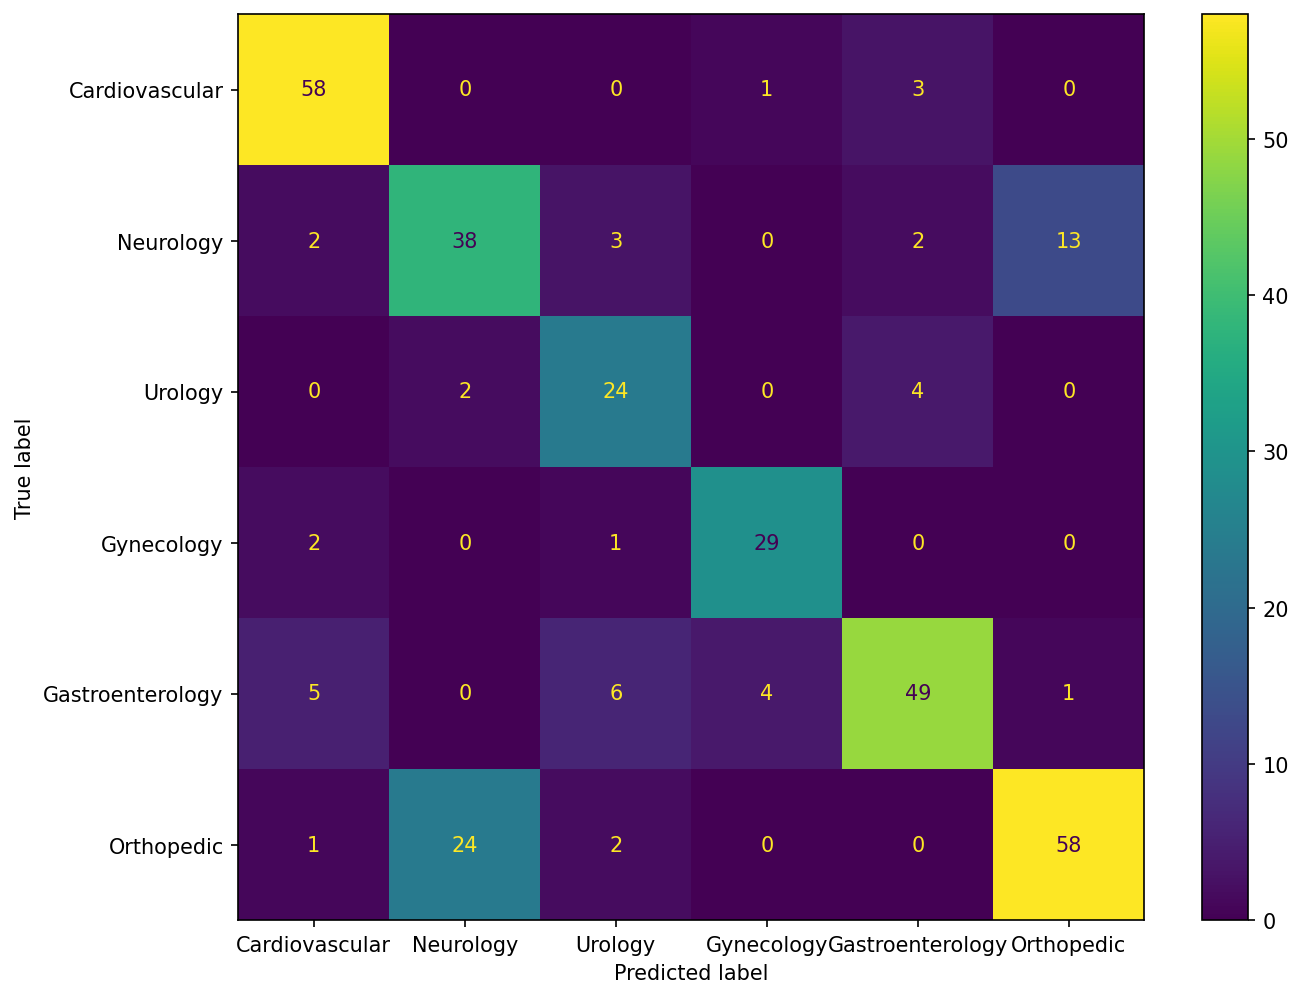

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt

# classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology']
classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic']
cm = metrics.confusion_matrix(y_test, y_pred_cnn_lstm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

#### LSTM

In [22]:
from dsbox.ml.neural_networks.keras_factory.text_models import LSTMFactory

t2s=Text2Sequence(stemmer=EnglishStemmer())

model = TextNeuralNetPipeline(text2seq=t2s,
                              factory_class=LSTMFactory, 
                              num_labels=6)

In [23]:
lstm = model.fit(X_train, y_train, 
                        epochs=15,
                        batch_size=100, 
          shuffle=True)
y_pred_lstm = lstm.predict(X_test)

/Users/ayushgupta/opt/anaconda3/lib/python3.8/site-packages/dsbox/ml/neural_networks/processing/text_classification.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return sequence.pad_sequences(np.array(word_ids), maxlen=self.seq_len, value=pad_value)


Epoch 1/15
14/14 [==============================] - 8s 484ms/step - loss: 1.7607 - accuracy: 0.2276
Epoch 2/15
14/14 [==============================] - 7s 495ms/step - loss: 1.6963 - accuracy: 0.2856
Epoch 3/15
14/14 [==============================] - 7s 484ms/step - loss: 1.5335 - accuracy: 0.4190
Epoch 4/15
14/14 [==============================] - 7s 525ms/step - loss: 1.2719 - accuracy: 0.5011
Epoch 5/15
14/14 [==============================] - 7s 496ms/step - loss: 1.1427 - accuracy: 0.6323
Epoch 6/15
14/14 [==============================] - 7s 534ms/step - loss: 0.8564 - accuracy: 0.6496
Epoch 7/15
14/14 [==============================] - 7s 467ms/step - loss: 0.6730 - accuracy: 0.7438
Epoch 8/15
14/14 [==============================] - 7s 463ms/step - loss: 0.5035 - accuracy: 0.8395
Epoch 9/15
14/14 [==============================] - 7s 465ms/step - loss: 0.4066 - accuracy: 0.8531
Epoch 10/15
14/14 [==============================] - 7s 467ms/step - loss: 0.3506 - accuracy: 0.8779

In [24]:
lstm.predict(["Focused examination of the right index finger demonstrates a 1 cm transverse wound across the dorsal DIP joint. The wound has almost completely healed. There are three residual nylon sutures, which are all removed today. There is no localized erythema, induration, swelling or tenderness. There is an extensor lag of approximately 20 degrees at the DIP joint. There is full passive extension of the distal phalanx at the joint. There is mild hyperextension at the PIP joint."])

array([5])

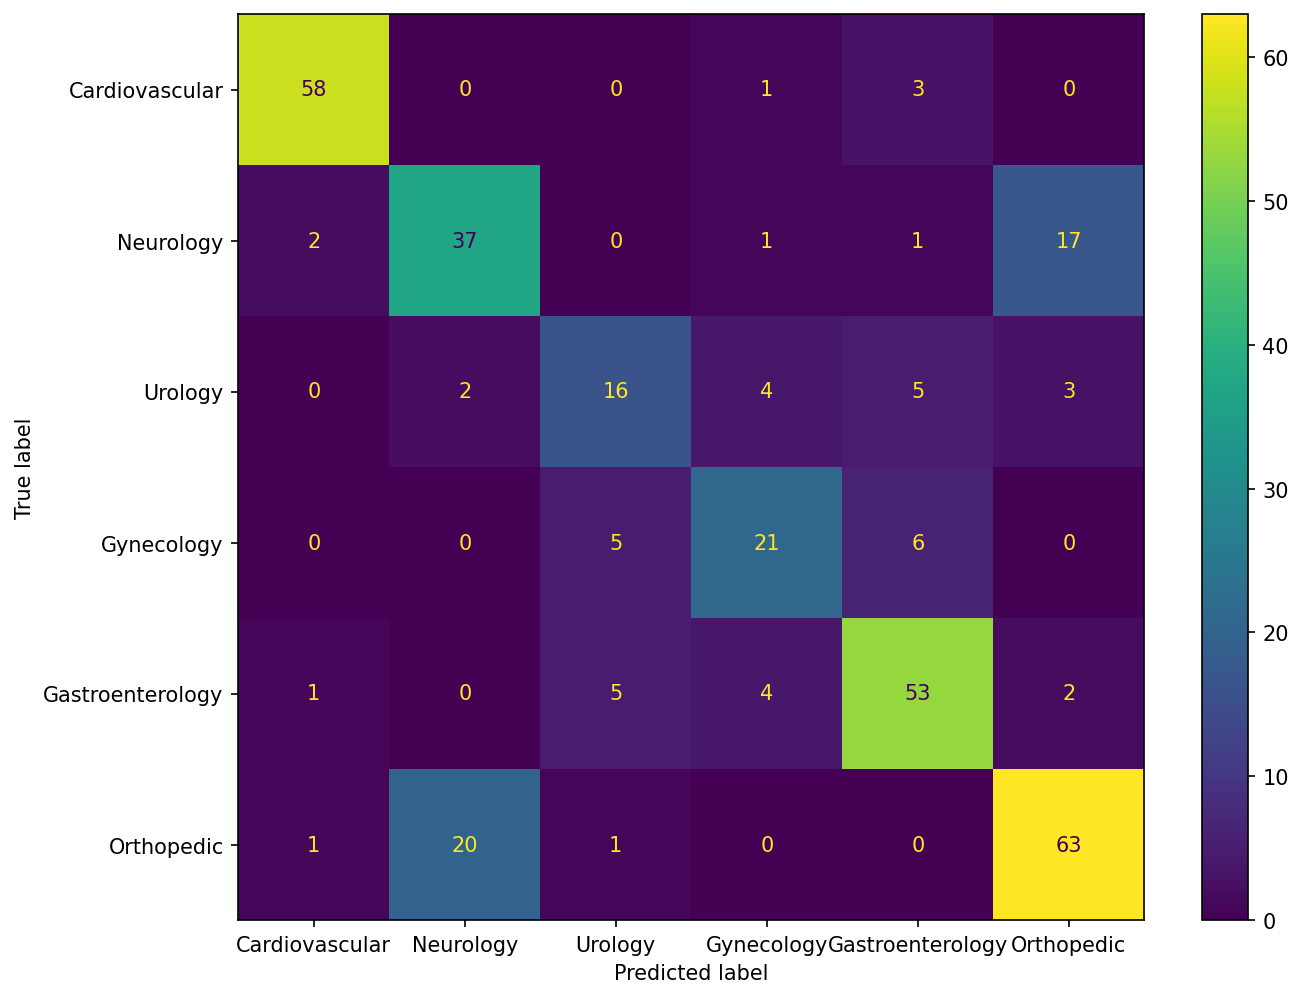

In [25]:
# classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology']
classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic']
cm = metrics.confusion_matrix(y_test, y_pred_lstm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

## ML models

#### Logistic Regression

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['Report'].tolist())
feature_names = sorted(vectorizer.get_feature_names())
del feature_names[0:35]

In [28]:
pca = PCA(n_components=0.45)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())

labels = data['speciality'].tolist()

In [29]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(tfIdfMat_reduced, 
                                                                    labels, 
                                                                    stratify=labels,
                                                                    random_state=1)

In [30]:
model = LogisticRegression(random_state=0)
log_reg = model.fit(X_train_new, y_train_new)

In [31]:
y_pred_log_reg= log_reg.predict(X_test_new)

In [32]:
test_text = 'Focused examination of the right index finger demonstrates a 1 cm transverse wound across the dorsal DIP joint. The wound has almost completely healed. There are three residual nylon sutures, which are all removed today. There is no localized erythema, induration, swelling or tenderness. There is an extensor lag of approximately 20 degrees at the DIP joint. There is full passive extension of the distal phalanx at the joint. There is mild hyperextension at the PIP joint.'
vector = vectorizer.transform([test_text])
vector_pca = pca.transform(vector.toarray())
log_reg.predict(vector_pca)

array(['Orthopedic'], dtype='<U16')

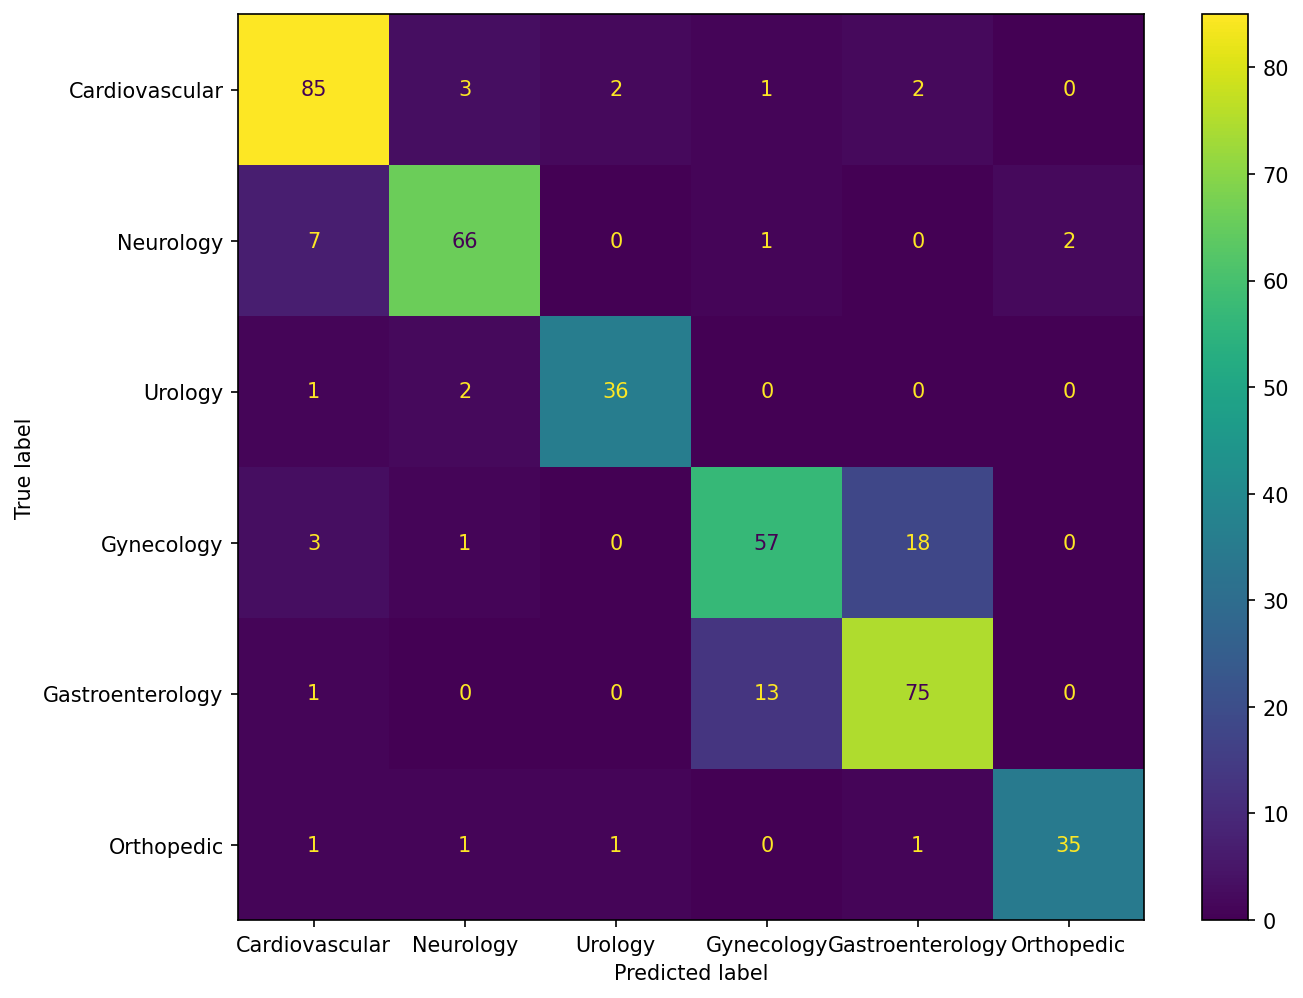

In [33]:
# classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology']
classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic']
cm = metrics.confusion_matrix(y_test_new, y_pred_log_reg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report
print(classification_report(y_test_new,y_pred_log_reg,labels=classes))

                  precision    recall  f1-score   support

  Cardiovascular       0.87      0.91      0.89        93
       Neurology       0.79      0.72      0.75        79
         Urology       0.95      0.90      0.92        39
      Gynecology       0.92      0.92      0.92        39
Gastroenterology       0.90      0.87      0.89        76
      Orthopedic       0.78      0.84      0.81        89

        accuracy                           0.85       415
       macro avg       0.87      0.86      0.86       415
    weighted avg       0.85      0.85      0.85       415



#### SVM

In [35]:
from sklearn import svm

In [36]:
model = svm.SVC()
support_vector_machine = model.fit(X_train_new, y_train_new)

In [37]:
y_pred_svm = support_vector_machine.predict(X_test_new)

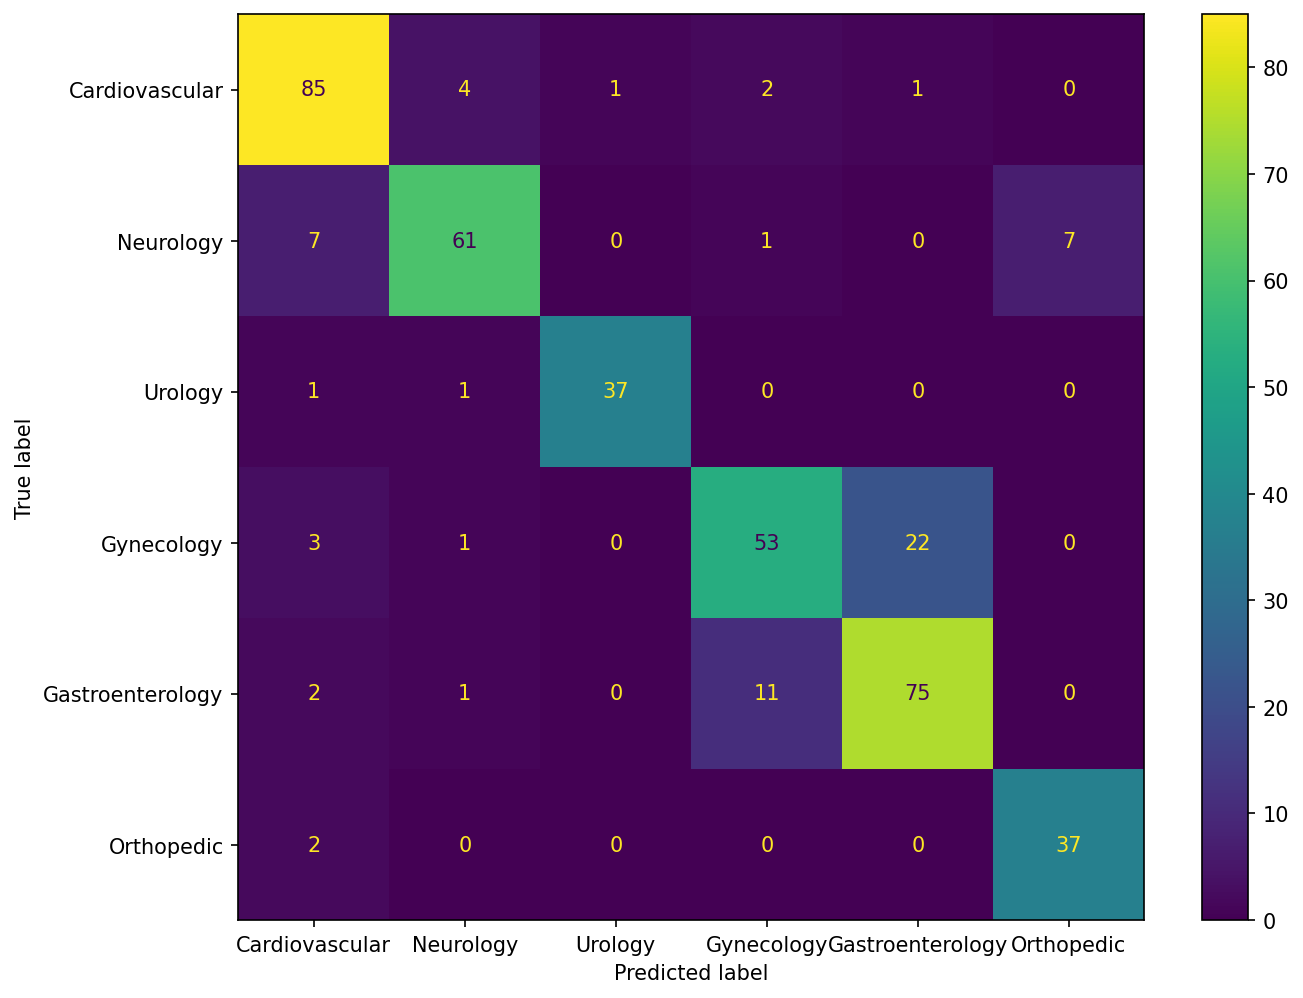

In [38]:
# classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology']
classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic']
cm = metrics.confusion_matrix(y_test_new, y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

In [39]:
print(classification_report(y_test_new,y_pred_svm,labels=classes))

                  precision    recall  f1-score   support

  Cardiovascular       0.85      0.91      0.88        93
       Neurology       0.79      0.67      0.73        79
         Urology       0.84      0.95      0.89        39
      Gynecology       0.97      0.95      0.96        39
Gastroenterology       0.90      0.80      0.85        76
      Orthopedic       0.77      0.84      0.80        89

        accuracy                           0.84       415
       macro avg       0.85      0.85      0.85       415
    weighted avg       0.84      0.84      0.84       415



#### Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(n_estimators=100)
ran_for = model.fit(X_train_new, y_train_new)

In [42]:
y_pred_rf = ran_for.predict(X_test_new)

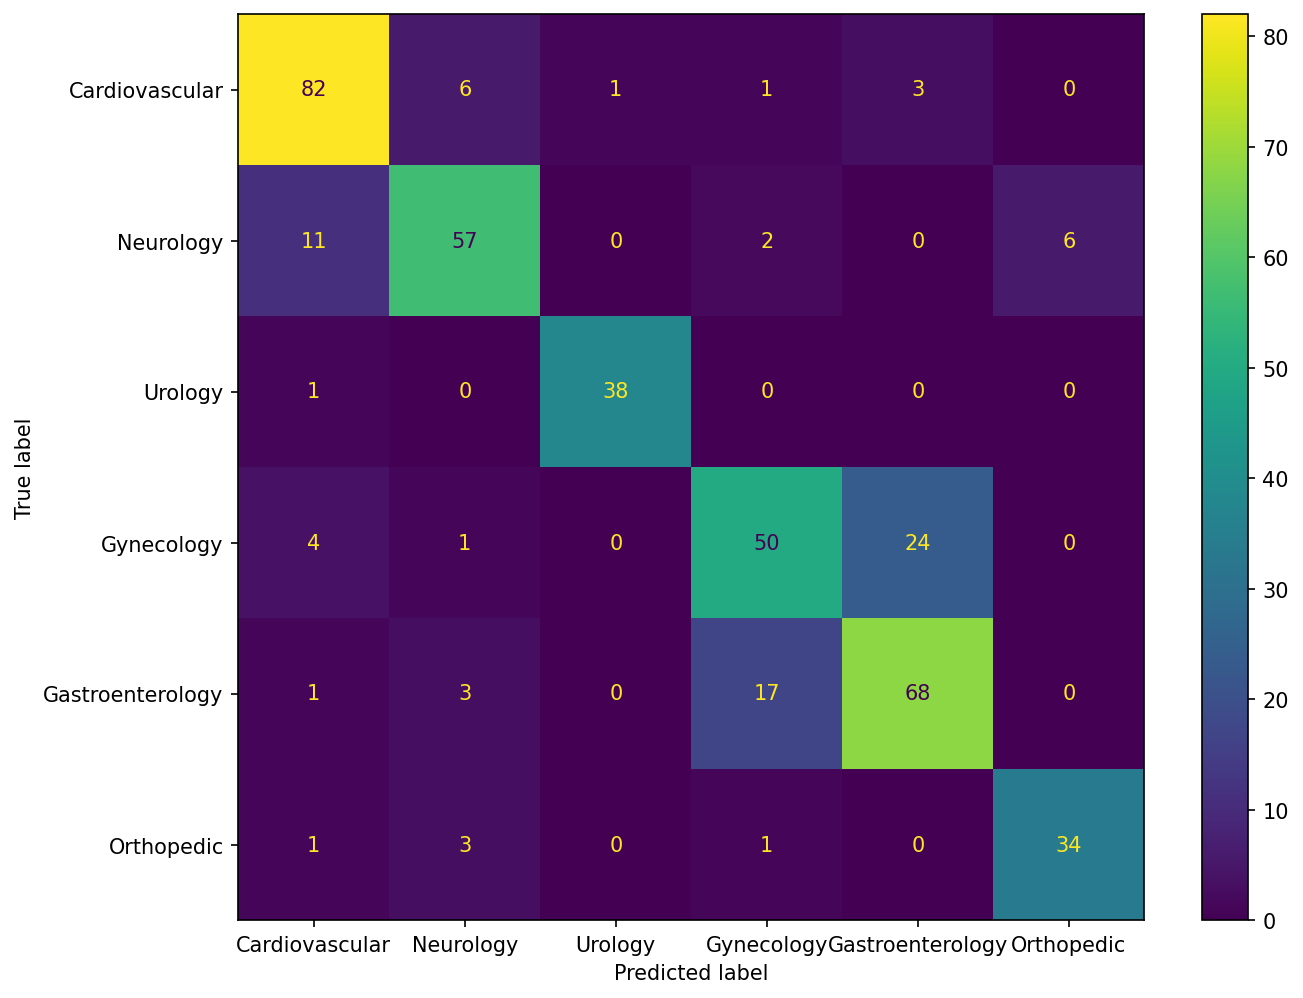

In [43]:
# classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology']
classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic']
cm = metrics.confusion_matrix(y_test_new, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

In [44]:
print(classification_report(y_test_new,y_pred_rf,labels=classes))

                  precision    recall  f1-score   support

  Cardiovascular       0.82      0.88      0.85        93
       Neurology       0.70      0.63      0.67        79
         Urology       0.85      0.87      0.86        39
      Gynecology       0.97      0.97      0.97        39
Gastroenterology       0.81      0.75      0.78        76
      Orthopedic       0.72      0.76      0.74        89

        accuracy                           0.79       415
       macro avg       0.81      0.81      0.81       415
    weighted avg       0.79      0.79      0.79       415



### Ensemble approach

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [46]:
ensemble_model = VotingClassifier(estimators=[('log_reg', log_reg), ('support_vector_machine', support_vector_machine), ('ran_for', ran_for)],voting='hard')
ensemble = ensemble_model.fit(X_train_new, y_train_new)

In [47]:
X_train_new[0]

array([ 0.18110199,  0.11468373,  0.05869752,  0.03657974, -0.07695144,
       -0.05315988, -0.0551022 ,  0.02012918, -0.02174189, -0.02937567,
       -0.14695141,  0.00308586, -0.00495935,  0.18238085,  0.02453106,
        0.01836224,  0.06657854, -0.05997131,  0.07218129,  0.11482174,
        0.12791245, -0.09720965, -0.06630182, -0.03503706, -0.03052183,
        0.02058024,  0.06957775, -0.18604536,  0.12183339,  0.0486173 ,
        0.01620648, -0.02871799, -0.05442698,  0.00393444,  0.00039795,
        0.00790188,  0.04115782,  0.02049637, -0.05020713, -0.01306905,
       -0.00433833, -0.05605903,  0.0675484 ,  0.04882948,  0.04847127,
        0.01662548,  0.0220408 ,  0.01026916,  0.03216001,  0.02776475,
       -0.079511  ,  0.01637519, -0.01201875,  0.17371051,  0.03805563,
       -0.06748648,  0.07090481, -0.14407395,  0.024584  , -0.01874206,
       -0.13142962, -0.04045648, -0.06894554, -0.07301548,  0.00078737,
       -0.04807255, -0.05299443, -0.07647048,  0.13512283, -0.04

In [48]:
y_pred_ensemble = ensemble.predict(X_test_new)

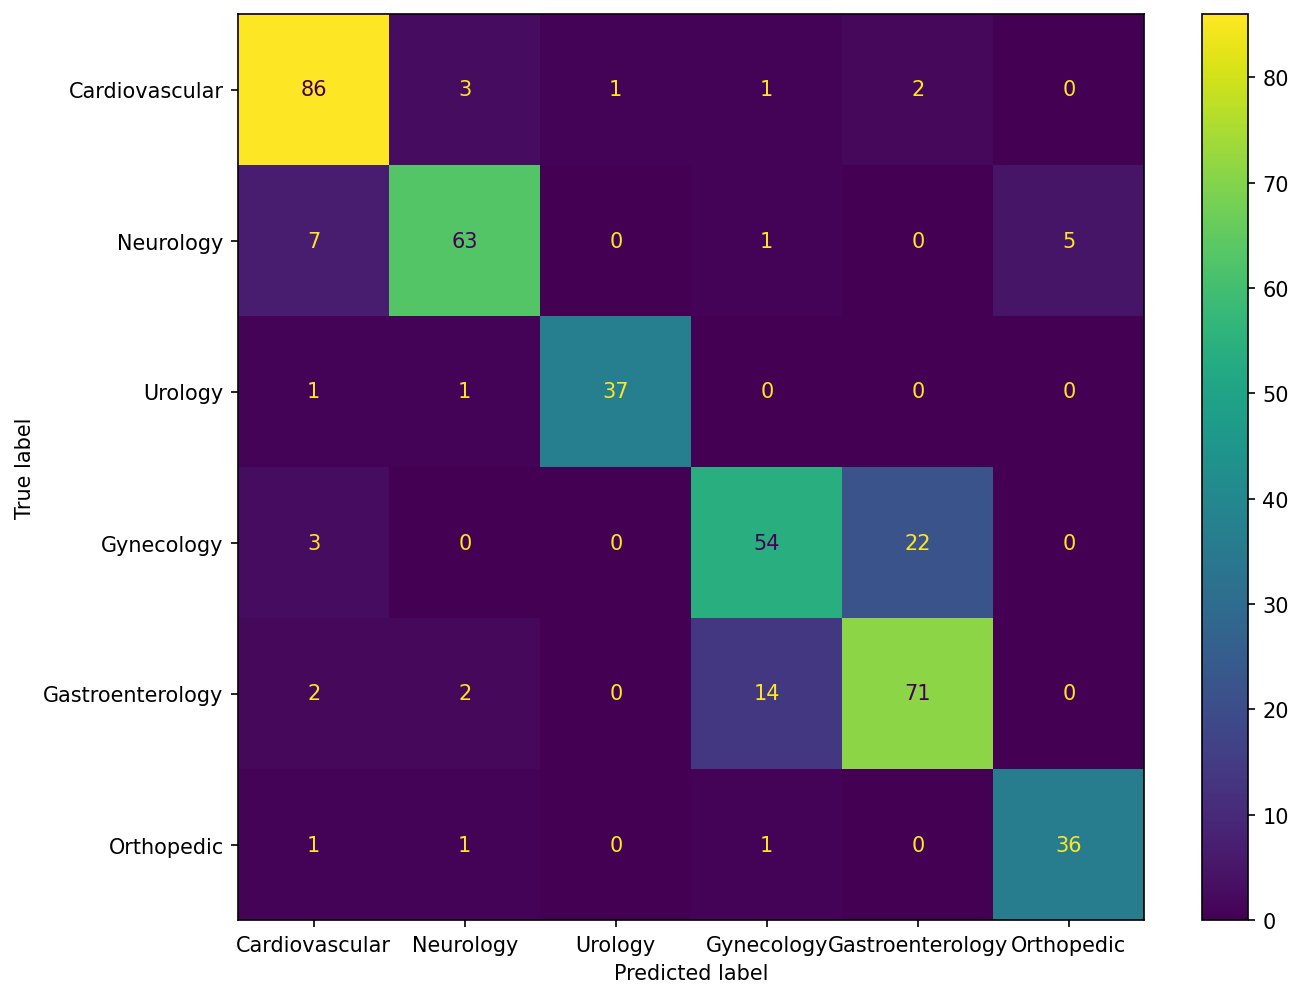

In [49]:
#for now only ML models
# classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic', 'Surgery', 'Radiology']
classes = ['Cardiovascular', 'Neurology', 'Urology', 'Gynecology', 'Gastroenterology', 'Orthopedic']
cm = metrics.confusion_matrix(y_test_new, y_pred_ensemble)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

In [50]:
print(classification_report(y_test_new,y_pred_ensemble,labels=classes))

                  precision    recall  f1-score   support

  Cardiovascular       0.86      0.92      0.89        93
       Neurology       0.76      0.68      0.72        79
         Urology       0.88      0.92      0.90        39
      Gynecology       0.97      0.95      0.96        39
Gastroenterology       0.90      0.83      0.86        76
      Orthopedic       0.75      0.80      0.77        89

        accuracy                           0.84       415
       macro avg       0.85      0.85      0.85       415
    weighted avg       0.84      0.84      0.84       415



In [51]:
test_text = 'Focused examination of the right index finger demonstrates a 1 cm transverse wound across the dorsal DIP joint. The wound has almost completely healed. There are three residual nylon sutures, which are all removed today. There is no localized erythema, induration, swelling or tenderness. There is an extensor lag of approximately 20 degrees at the DIP joint. There is full passive extension of the distal phalanx at the joint. There is mild hyperextension at the PIP joint.'
vector = vectorizer.transform([test_text])
vector_pca = pca.transform(vector.toarray())
ensemble.predict(vector_pca)[0]

'Orthopedic'

## Creating Medical Speciality Class

In [52]:
class MedicalSpeciality:
    
    def pred_CNNLSTM(self,sample_text):
        value = cnn_lstm.predict([sample_text])[0]
        if value == 0:
            return "Cardiovascular"
        elif value == 1:
            return "Neurology"
        elif value == 2:
            return "Urology"
        elif value == 3:
            return "Gynecology"
        elif value == 4:
            return "Gastroenterology"
        return "Orthopedic"
    
    def pred_LSTM(self,sample_text):
        value = lstm.predict([sample_text])[0]
        if value == 0:
            return "Cardiovascular"
        elif value == 1:
            return "Neurology"
        elif value == 2:
            return "Urology"
        elif value == 3:
            return "Gynecology"
        elif value == 4:
            return "Gastroenterology"
        return "Orthopedic"
    
    def pred_ML_Ensemble(self,sample_text):
        vector = vectorizer.transform([sample_text])
        vector_pca = pca.transform(vector.toarray())
        return ensemble.predict(vector_pca)[0]

    def final_prediction(self,sample_text):
        CNNLSTM = self.pred_CNNLSTM(sample_text)
        LSTM = self.pred_LSTM(sample_text)
        ENSM = self.pred_ML_Ensemble(sample_text)
    
        if CNNLSTM == LSTM and CNNLSTM == ENSM:
            return CNNLSTM
        elif CNNLSTM == LSTM and CNNLSTM != ENSM:
            if CNNLSTM != "Orthopedic" and ENSM == "Orthopedic":
                return ENSM
            elif CNNLSTM != "Neurology" and ENSM == "Neurology":
                return ENSM
            else:
                return CNNLSTM
        return CNNLSTM
        

#### Testing the medical speciality class functions

In [53]:
test_text = "The patient is a (XX)-year-old female with a history of CKD stage III secondary to membranoproliferative glomerulonephritis. This was accompanied by significant nephrotic syndrome and microscopic hematuria. Urine protein prior was 5.9 grams, and at the time of her renal biopsy, it was as high as 18 grams. Serologies were done and these were all negative. In particular, her ANA was negative, ANCA negative, hepatitis A, B, and C negative, HIV negative, ASO less than 200. C3, C4, and CH50 were all negative. She had generalized edema secondary to her nephrotic syndrome and was treated with diuretics. She had hyperlipidemia. Creatinine was 1.7 last April. She had two hospitalizations; the first in September-October when her glomerulonephritis was diagnosed and then again in December with recurrence of her edema. She was treated with dipyridamole, fish oil capsules, and prednisone. She was initially evaluated by me last April. At that time, BUN was 20, creatinine 2.2, hemoglobin 9.4, albumin 1.2, potassium 3.3. She required diuretics for treatment of her edema. Blood pressures were stable at 120/80. Again, repeat serologies were performed. C3-C4 levels normal, ANA negative, CH50 normal, hepatitis B and C antibody negative. Creatinine was 1.8 in December. Albumin 1.5, hemoglobin 9.8, cholesterol 459, and triglycerides 155. Subsequently, she was placed on Crestor, PhosLo and lisinopril to reduce the urine protein. Urine protein-to-creatinine ratio could not be determined because of her extremely high urine protein. Urine sediment examined in the office showed evidence of significant microscopic hematuria with dysmorphic red cells. When last seen in the office, her labs on recheck showed creatinine of 1.8, BUN 26. Electrolytes were normal. Albumin 1.4, glucose 79, hemoglobin 9.9, TSH high at 10, ferritin 202, percent saturation of iron 34, PTH level 42, cholesterol 226, triglycerides 165, LDL 162, phosphorous 6.4, free T4 normal at 0.9. When seen in December, she admitted that she had stopped all of her medications one week ago on her own. She had been counseled about the importance of taking medications. At that time, Lasix, Theo-Dur and PhosLo were prescribed. The patient was admitted on this occasion with epigastric abdominal pain. On exam in the emergency room, blood pressure was 118/86, pulse 68, she was afebrile. Chest was clear. Heart sounds regular. Abdomen: There was some mild tenderness. No rebound. Bowel sounds were normal. There was no peripheral edema."

In [54]:
# test_text = "Focused examination of the right index finger demonstrates a 1 cm transverse wound across the dorsal DIP joint. The wound has almost completely healed. There are three residual nylon sutures, which are all removed today. There is no localized erythema, induration, swelling or tenderness. There is an extensor lag of approximately 20 degrees at the DIP joint. There is full passive extension of the distal phalanx at the joint. There is mild hyperextension at the PIP joint."

In [55]:
specialty_detector = MedicalSpeciality()

In [56]:
specialty_detector.final_prediction(test_text)

'Gastroenterology'

#### Storing model in pickle file

In [61]:
import pickle

filename = 'model.pkl'
pickle.dump(specialty_detector, open(filename, 'wb'))

#### Loading model for the pickle file

In [62]:
test_text = "The patient is a (XX)-year-old female with a history of CKD stage III secondary to membranoproliferative glomerulonephritis. This was accompanied by significant nephrotic syndrome and microscopic hematuria. Urine protein prior was 5.9 grams, and at the time of her renal biopsy, it was as high as 18 grams. Serologies were done and these were all negative. In particular, her ANA was negative, ANCA negative, hepatitis A, B, and C negative, HIV negative, ASO less than 200. C3, C4, and CH50 were all negative. She had generalized edema secondary to her nephrotic syndrome and was treated with diuretics. She had hyperlipidemia. Creatinine was 1.7 last April. She had two hospitalizations; the first in September-October when her glomerulonephritis was diagnosed and then again in December with recurrence of her edema. She was treated with dipyridamole, fish oil capsules, and prednisone. She was initially evaluated by me last April. At that time, BUN was 20, creatinine 2.2, hemoglobin 9.4, albumin 1.2, potassium 3.3. She required diuretics for treatment of her edema. Blood pressures were stable at 120/80. Again, repeat serologies were performed. C3-C4 levels normal, ANA negative, CH50 normal, hepatitis B and C antibody negative. Creatinine was 1.8 in December. Albumin 1.5, hemoglobin 9.8, cholesterol 459, and triglycerides 155. Subsequently, she was placed on Crestor, PhosLo and lisinopril to reduce the urine protein. Urine protein-to-creatinine ratio could not be determined because of her extremely high urine protein. Urine sediment examined in the office showed evidence of significant microscopic hematuria with dysmorphic red cells. When last seen in the office, her labs on recheck showed creatinine of 1.8, BUN 26. Electrolytes were normal. Albumin 1.4, glucose 79, hemoglobin 9.9, TSH high at 10, ferritin 202, percent saturation of iron 34, PTH level 42, cholesterol 226, triglycerides 165, LDL 162, phosphorous 6.4, free T4 normal at 0.9. When seen in December, she admitted that she had stopped all of her medications one week ago on her own. She had been counseled about the importance of taking medications. At that time, Lasix, Theo-Dur and PhosLo were prescribed. The patient was admitted on this occasion with epigastric abdominal pain. On exam in the emergency room, blood pressure was 118/86, pulse 68, she was afebrile. Chest was clear. Heart sounds regular. Abdomen: There was some mild tenderness. No rebound. Bowel sounds were normal. There was no peripheral edema."

In [63]:
# loading the specialty detector model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))
result = loaded_model.final_prediction(test_text)
result

'Gastroenterology'

#### calculating the accuracy of the finalized model

In [60]:
# match = 0
# not_match = 0
# for ind in data.index:
#     if specialty_detector.final_prediction(data['Report'][ind]) == data['speciality'][ind] :
#         match+=1
#     elif specialty_detector.final_prediction(data['Report'][ind]) != data['speciality'][ind] :
#         not_match+=1


KeyboardInterrupt: 

In [ ]:
# print("Accuracy: ")
# print((match*100)/(match+not_match))